<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#【项目简介】" data-toc-modified-id="【项目简介】-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>【项目简介】</a></span></li><li><span><a href="#【数据导入及预处理】" data-toc-modified-id="【数据导入及预处理】-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>【数据导入及预处理】</a></span></li><li><span><a href="#【数据的探索性分析】" data-toc-modified-id="【数据的探索性分析】-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>【数据的探索性分析】</a></span></li><li><span><a href="#【数据建模】" data-toc-modified-id="【数据建模】-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>【数据建模】</a></span></li><li><span><a href="#【模型结果评价】" data-toc-modified-id="【模型结果评价】-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>【模型结果评价】</a></span></li><li><span><a href="#【决策树可视化】" data-toc-modified-id="【决策树可视化】-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>【决策树可视化】</a></span></li></ul></div>

# 【项目简介】

我们国家主要的移动通讯运营商有三个，它们分别是：移动，电信，联通。在过去的十年里，这三家公司都得到了极其快速的增长。这种增长主要来源于移动通讯设备的普及，来源于发卡量的增长。

但是，在过去的几年里，故事有所变化。一个很大的变化是，发卡量似乎不再增长了，因为手机已经完全普及了。在这种情况下，如何实现业务增长，成了三大运营商头痛的问题。一个方案是精耕细作，极大化现有客户的价值。一个方案就是挖墙脚，争取把竞争对手的客户吸引过来。

因此就出现了，联通挖电信，电信抢移动，移动偷联通的激烈竞争局面。一个直接后果就是客户流失率的居高不下，尤其是高价值客户。因此，客户流失成了运营商大会小会都要谈的重要问题。为此，通过数据分析，理解客户的流失规律意义重大。

为此，熊大为大家分享一个来自某运营商的真实数据。该数据包含4975条有效观测。每条观测来自于一个手机号码的某个年度。

- 套餐金额：用户购买的月套餐的金额，1为96元以下，2为96到225元，3为225元以上

- 额外通话时长：用户的实际通话时长减去套餐内包含的通话时长得出用户在使用期间的每月额外通话时长，这部分需要用户额外交费。数值是每月的额外通话时长的平均值，单位：分钟

- 额外流量：用户的使用的实际流量减去套餐内包含的流量得出用户在使用期间的每月额外流量，这部分需要用户额外交费。数值是每月的额外流量的平均值，单位：兆

- 改变行为：是否曾经改变过套餐金额，1=是，0=否

- 服务合约：用户是否与联通签订过服务合约，1=是，0=否

- 关联购买：用户在使用联通移动服务过程中是否还同时办理其他业务（主要是固定电话和宽带业务），1=同时办理一项其他业务，2=同时办理两项其他业务，0=没有办理其他业务

- 集团用户：用户办理的是否是集团业务，相比个人业务，集体办理的号码在集团内拨打有一定优惠。1=是，0=否

- 使用月数：截止到观测期结束（2012.1-2014.1），用户使用联通服务的时间长短，单位：月

- 流失用户：在25个月的观测期内，用户是否已经流失。1=是，0=否

# 【数据导入及预处理】

In [15]:
# 导入分析用到的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('ggplot')
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')

In [16]:
# 导入csv文件
#df = pd.read_csv('CustomerSurvival.csv',encoding='utf-8')
#df.head()
#数据理解及变量解释
df = pd.read_excel('CustomerSurvival.xlsx', encoding='utf-8')
df.head()

,ID,套餐金额,额外通话时长,额外流量,改变行为,服务合约,关联购买,集团用户,使用月数,流失用户
0,1,1,792.833333,-10.450067,0,0,0,0,25,0
1,2,1,121.666667,-21.141117,0,0,0,0,25,0
2,3,1,-30.000000,-25.655273,0,0,0,0,2,1
3,4,1,241.500000,-288.341254,0,1,0,1,25,0
4,5,1,1629.666667,-23.655505,0,0,0,1,25,0


一共10个字段，且都是数值型变量，4975行数据，为便于分析，我们将中文字段改为英文：

In [17]:
df.columns = ['id','pack_type','extra_time','extra_flow','pack_change',
             'contract','asso_pur','group_user','use_month','loss']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975 entries, 0 to 4974
Data columns (total 10 columns):
id             4975 non-null int64
pack_type      4975 non-null int64
extra_time     4975 non-null float64
extra_flow     4975 non-null float64
pack_change    4975 non-null int64
contract       4975 non-null int64
asso_pur       4975 non-null int64
group_user     4975 non-null int64
use_month      4975 non-null int64
loss           4975 non-null int64
dtypes: float64(2), int64(8)
memory usage: 388.8 KB


id -- 用户的唯一标识  
pack_type -- 用户的月套餐的金额，1为96元以下，2为96到225元，3为225元以上  
extra_time -- 用户在使用期间的每月额外通话时长，这部分需要用户额外交费。数值是每月的额外通话时长的平均值,单位：分钟  
extra_flow -- 用户在使用期间的每月额外流量，这部分需要用户额外交费。数值是每月的额外流量的平均值，单位：兆  
pack_change -- 是否曾经改变过套餐金额，1=是，0=否  
contract -- 用户是否与联通签订过服务合约，1=是，0=否  
asso_pur -- 用户在使用联通移动服务过程中是否还同时办理其他业务，1=同时办理一项其他业务，2=同时办理两项其他业务，0=没有办理其他业务  
group_use -- 用户办理的是否是集团业务，相比个人业务，集体办理的号码在集团内拨打有一定优惠。1=是，0=否  
use_month -- 截止到观测期结束（2012.1-2014.1），用户使用联通服务的时间长短，单位：月  
loss -- 在25个月的观测期内，用户是否已经流失。1=是，0=否  
---因变量是 'loss'，是否流失，也是我们预测的目标值  

---自变量分为三类：  

连续型变量：extra_time，extra_flow,  use_month  
二元分类变量：pack_change，contract,  group_use  
多元分类变量：pack_type，asso_pur  

In [19]:
#先看一下各个字段是否有缺失：
df.isnull().any()

id             False
pack_type      False
extra_time     False
extra_flow     False
pack_change    False
contract       False
asso_pur       False
group_user     False
use_month      False
loss           False
dtype: bool

In [20]:
len(df.id.unique())

4975

# 【数据的探索性分析】

In [21]:
df.describe()

,id,pack_type,extra_time,extra_flow,pack_change,contract,asso_pur,group_user,use_month,loss
count,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000
mean,2488.000000,1.057688,258.520030,-71.580403,0.021307,0.245226,0.047437,0.227337,14.774271,0.782714
std,1436.303125,0.258527,723.057190,275.557448,0.144419,0.430264,0.278143,0.419154,6.534273,0.412441
min,1.000000,1.000000,-2828.333333,-2189.875986,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1244.500000,1.000000,-126.666667,-74.289824,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000
50%,2488.000000,1.000000,13.500000,-59.652734,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000
75%,3731.500000,1.000000,338.658333,-25.795045,0.000000,0.000000,0.000000,0.000000,19.000000,1.000000
max,4975.000000,3.000000,4314.000000,2568.704293,1.000000,1.000000,2.000000,1.000000,25.000000,1.000000


可以看到extra_time和extra_flow有正负值，正数表示用户有额外的通话时长和流量，负数为用户在月底时剩余的套餐时长和流量。从四分位数中可看出超过一半的用户有额外通话时间，流量的话只有小部分用户超额使用了。另外其他的分类型变量在描述统计上并未发现有异常的地方。

在这里特别注意下use_month这个变量，数据的观测区间为2012.1-2014.1，一共25个月，且案例中关于流失的定义为：

超过一个月没有使用行为（包括通话，使用流量）的用户判定为流失。

在数据集中use_month小于25个月的基本都是流失状态，所以这个变量对于流失的预测并没有什么关键作用，后续导入模型时需剔除这个变量。

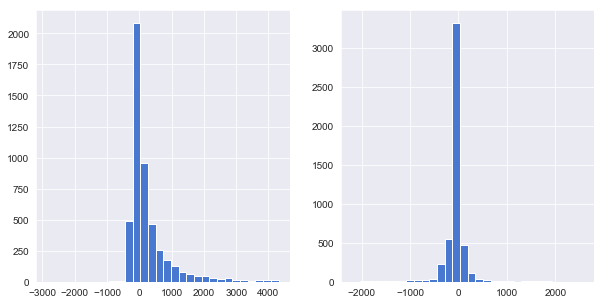

In [22]:
#变量的分布

#首先看一下两个连续型变量：extra_time和extra_flow的数据分布：
plt.figure(figsize = (10,5))
plt.subplot(121)
df.extra_time.hist(bins = 30)
plt.subplot(122)
df.extra_flow.hist(bins = 30)

extra_time呈现的是右偏分布，extra_flow近似服从正态分布，与描述统计中的情况大致吻合

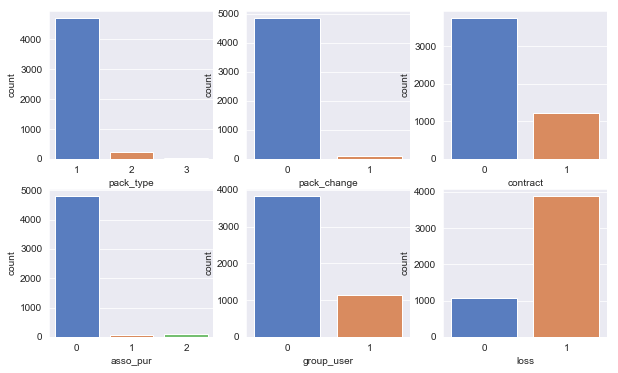

In [18]:
#接下来看看分类型变量的分布：
fig,axes = plt.subplots(nrows = 2,ncols = 3, figsize = (10,6))
sns.countplot(x = 'pack_type',data = df,ax=axes[0,0])
sns.countplot(x = 'pack_change',data = df,ax=axes[0,1])
sns.countplot(x = 'contract',data = df,ax=axes[0,2])
sns.countplot(x = 'asso_pur',data = df,ax=axes[1,0])
sns.countplot(x = 'group_user',data = df,ax=axes[1,1])
sns.countplot(x = 'loss',data = df,ax=axes[1,2])

可以看到pack_type, pack_change, asso_pur的类型分布非常不均衡，例如asso_pur,办理过套餐外业务的用户数量极少，导致样本缺乏足够的代表性，可能会对模型的最终结果产生一定的影响。

<Figure size 720x432 with 0 Axes>

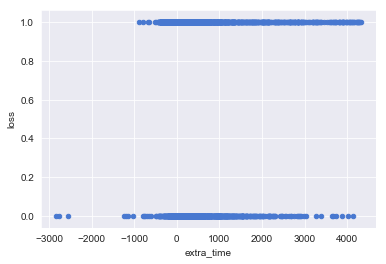

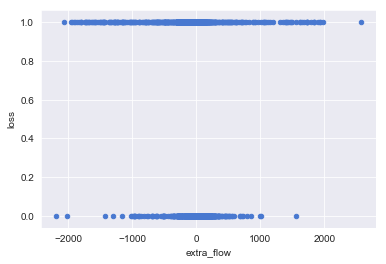

In [19]:
#自变量与因变量之间的关系：

#对于extra_time和extra_flow绘制散点图观察：
plt.figure(figsize = (10,6))
df.plot.scatter(x='extra_time',y='loss')
df.plot.scatter(x='extra_flow',y='loss')

In [20]:
#从散点图上似乎感觉两个自变量与是否流失并无关系，为了更好的展示其相关性，我们对extra_time和extra_flow进行分箱处理，再绘制条形图：

# 增加分箱后的两个字段
bin1 = [-3000,-2000,-500,0,500,2000,3000,5000]
df['time_label'] = pd.cut(df.extra_time,bins = bin1)
bin2 = [-3000,-2000,-500,0,500,2000,3000]
df['flow_label'] = pd.cut(df.extra_flow,bins = bin2)
# 观察一下分箱后的数据分布
time_amount = df.groupby('time_label').id.count().sort_values().reset_index()
time_amount['amount_cumsum'] = time_amount.id.cumsum()
time_amount['prop'] = time_amount.apply(lambda x:x.amount_cumsum/4975,axis =1)
flow_amount = df.groupby('flow_label').id.count().sort_values().reset_index()
flow_amount['amount_cumsum'] = flow_amount.id.cumsum()
flow_amount['prop'] = flow_amount.apply(lambda x:x.amount_cumsum/4975,axis=1)

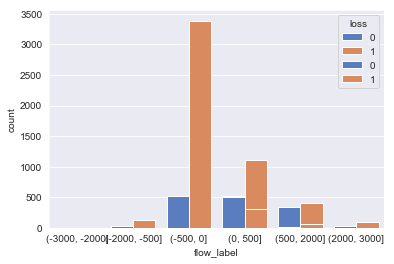

In [21]:
sns.countplot(x = 'time_label',hue = 'loss',data =df)
sns.countplot(x = 'flow_label',hue = 'loss',data =df)

对extra_time进行累加统计，发现【-500,500】这个区间的用户占了80%，符合二八定律

对extra_flow进行累加统计，发现【-500,500】占了95%，且（-500,0】的用户占80%，可以说只有小部分用户每月会超额使用流量。

可以明显的看出用户使用的通话时间和流量越多，流失概率越低，这些超额使用的用户在用户分类中属于'高价值用户'，用户粘性很高，运营商应该把重点放在这些用户身上，采取有效的手段预防其流失。

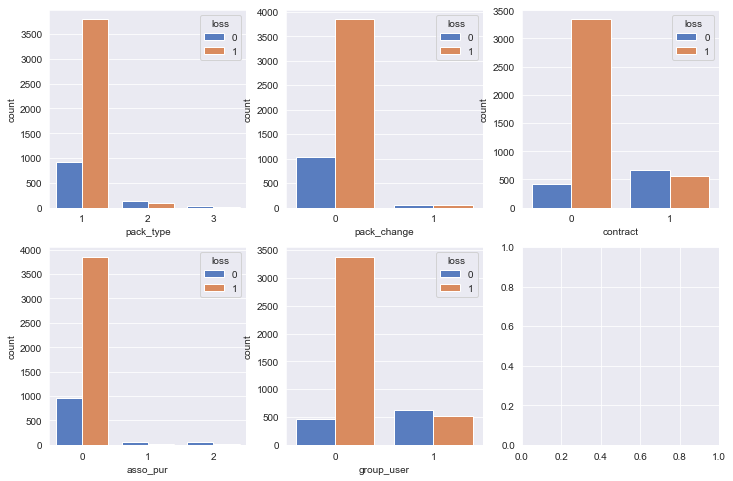

In [22]:
#接着看其他自变量与流失的关系
fig,axes = plt.subplots(nrows = 2,ncols = 3, figsize = (12,8))
sns.countplot(x = 'pack_type',hue = 'loss',data =df,ax = axes[0][0])
sns.countplot(x = 'pack_change',hue = 'loss',data =df,ax = axes[0][1])
sns.countplot(x = 'contract',hue = 'loss',data =df,ax = axes[0][2])
sns.countplot(x = 'asso_pur',hue = 'loss',data =df,ax = axes[1][0])
sns.countplot(x = 'group_user',hue = 'loss',data =df,ax = axes[1][1])

初步得出以下结论：

1）.套餐金额越大，用户越不易流失，套餐金额大的用户忠诚度也高

2）.改过套餐的用户流失的概率变小

3）.签订过合约的流失比例较小，签订合约也意味着一段时间内（比如2年，3年）用户一般都不会更换运营商号码，可以说签订合约的用户比较稳定

4）.办理过其它套餐业务的用户因样本量太少，后续再研究

5）.集团用户的流失率相比个人用户低很多

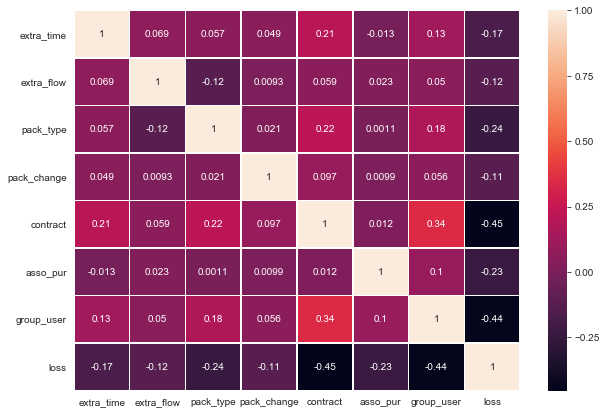

In [24]:
#相关性矩阵热力图观察各变量之间的相关性
internal_chars = ['extra_time','extra_flow','pack_type',
                 'pack_change','contract','asso_pur','group_user','loss']
corrmat = df[internal_chars].corr()
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='0')
sns.heatmap(corrmat, square=False, linewidths=.5, annot=True)

各自变量之间的相关性程度很低，排除了共线性问题。在对因变量的相关性上contract和group_user的系数相比其它变量较高，但也不是很强。

# 【数据建模】

因为自变量大多数为分类型，所以用决策树的效果比较好，而且决策树对异常值的敏感度很低，生成的结果也有很好的解释性。

1.特征的预处理

根据前面的探索性分析，并基于业务理解，我们决定筛选这几个特征进入模型：

extra_time，extra_flow，pack_type,  pack_change,  asso_pur

contract以及group_use，这些特征都对是否流失有一定的影响。

对于extra_time，extra_flow这两个连续型变量我们作数据转换，变成二分类变量，将没有超出套餐的通话时间和流量记为0，超出的记为1。这样所有特征都是统一的度量。

In [25]:
df['time_tranf'] = df.apply(lambda x:1 if x.extra_time>0 else 0,axis =1)
df['flow_tranf'] = df.apply(lambda x:1 if x.extra_flow>0 else 0,axis =1)
df.head()

,id,pack_type,extra_time,extra_flow,pack_change,contract,asso_pur,group_user,use_month,loss,time_label,flow_label,time_tranf,flow_tranf
0,1,1,792.833333,-10.450067,0,0,0,0,25,0,"(500, 2000]","(-500, 0]",1,0
1,2,1,121.666667,-21.141117,0,0,0,0,25,0,"(0, 500]","(-500, 0]",1,0
2,3,1,-30.000000,-25.655273,0,0,0,0,2,1,"(-500, 0]","(-500, 0]",0,0
3,4,1,241.500000,-288.341254,0,1,0,1,25,0,"(0, 500]","(-500, 0]",1,0
4,5,1,1629.666667,-23.655505,0,0,0,1,25,0,"(500, 2000]","(-500, 0]",1,0


2 建立自变量x, 因变量y的二维数组：

In [26]:
x = df.loc[:,['pack_type','time_tranf','flow_tranf','pack_change','contract','asso_pur','group_user']]
x = np.array(x)
x

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [3, 0, 0, ..., 1, 0, 1]], dtype=int64)

In [27]:
y = df.loss
y = y[:, np.newaxis]
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

3. 拆分训练集和测试集，比例为7:3

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

4. 建立决策树模型并拟合训练：

In [30]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini', #设置衡量的系数
                                    splitter='best', #选择分类的策略
                                    max_depth=5, #设置树的最大深度
                                    min_samples_split=10,#节点的最少样本数
                                    min_samples_leaf=5 #叶节点的最少样本数
                                    )
clf = clf.fit(x_train,y_train)  #拟合训练

In [32]:
train_score = clf.score(x_train,y_train) # 训练集的评分
test_score = clf.score(x_test,y_test)   # 测试集的评分
print('train_score:{0},test_score:{1}'.format(train_score,test_score))

train_score:0.8742102240091901,test_score:0.870060281312793


In [34]:
# 模型的参数调优--max_depth
# 创建一个函数，使用不同的深度来训练模型，并计算评分数据，也可用网格搜索等方法
def cv_score(d):
    clf2 = tree.DecisionTreeClassifier(max_depth=d)
    clf2 = clf2.fit(x_train,y_train)
    tr_score = clf2.score(x_train,y_train)
    cv_score = clf2.score(x_test,y_test)
    return (tr_score, cv_score)
# 构造参数范围，在这个范围内构造模型并计算评分
depths = range(2,15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]
# 找出交叉验证数据集最高评分的那个索引
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
print('best_param : {0},best_score: {1}'.format(best_param,best_score))

best_param : 4,best_score: 0.870060281312793


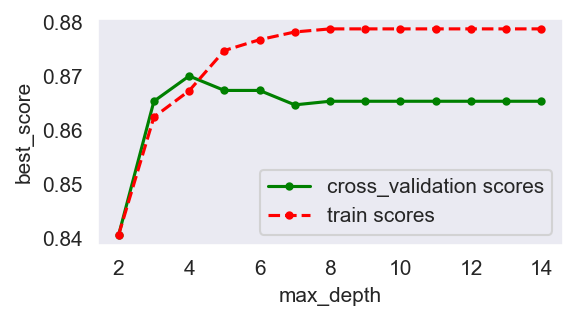

In [35]:
plt.figure(figsize = (4,2),dpi=150)
plt.grid()
plt.xlabel('max_depth')
plt.ylabel('best_score')
plt.plot(depths, cv_scores,'.g-',label = 'cross_validation scores')
plt.plot(depths,tr_scores,'.r--',label = 'train scores')
plt.legend()

# 【模型结果评价】

In [37]:
from sklearn.metrics import classification_report

y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65       307
           1       0.90      0.94      0.92      1186

   micro avg       0.87      0.87      0.87      1493
   macro avg       0.81      0.76      0.79      1493
weighted avg       0.86      0.87      0.86      1493



e:\workspace\env_prnet_366\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7256539589442815


<Figure size 432x288 with 0 Axes>

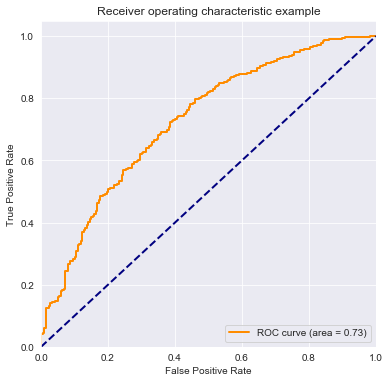

In [47]:
from sklearn import svm, datasets  
from sklearn.metrics import roc_curve, auc  # 计算roc和auc  
#from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

random_state = np.random.RandomState(0)  
n_samples, n_features = x.shape  
X = np.c_[x, random_state.randn(n_samples, 200 * n_features)]  
X_train, X_test, y_train2, y_test2 = train_test_split(X, y, test_size=.2,random_state=0)  
svm = svm.SVC(kernel='linear', probability=True,random_state=random_state) 
y_score = svm.fit(X_train, y_train2).decision_function(X_test)  
y_score = y_score[:, np.newaxis]
fpr,tpr,threshold = roc_curve(y_test2, y_score) # 计算真正率和假正率  
roc_auc = auc(fpr,tpr) # 计算auc的值  
print(roc_auc_score(y_test2, y_score))

plt.figure()  
lw = 2  
plt.figure(figsize=(6,6))  
plt.plot(fpr, tpr, color='darkorange',  
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver operating characteristic example')  
plt.legend(loc="lower right")  
plt.show()  

# 【决策树可视化】

In [41]:
from sklearn.tree import export_graphviz
with open('userloss.dot','w')as f:
    f=export_graphviz(clf,
                      feature_names=['pack_type','time_tranf','flow_tranf'
                      ,'pack_change','contract','asso_pur','group_user'],
                      class_names=['loss','not loss'],
                      filled=True, rounded=True,
                      special_characters=True,
                      out_file=f
                       )

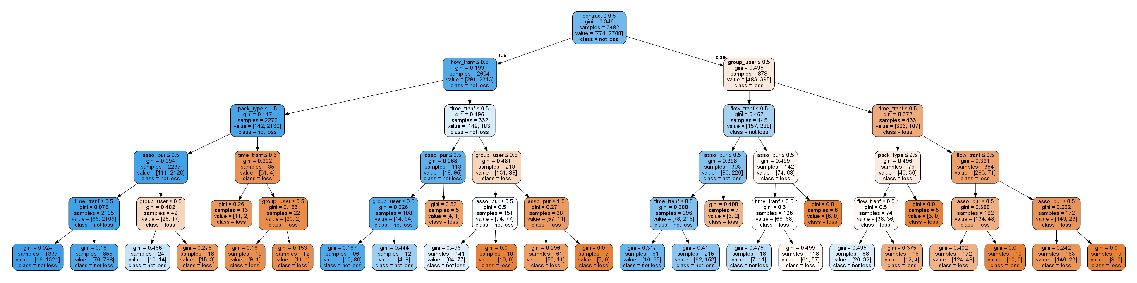

In [13]:
image = plt.imread('image.png') 

plt.figure(figsize=(20,20))
plt.xticks([])
plt.yticks([])

plt.imshow(image)
plt.show()